<a href="https://colab.research.google.com/github/Tomohiro-W/HoT/blob/master/Graduate10epoch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle



In [2]:
data = pd.read_csv("/content/drive/MyDrive/a-z alphabets/A_Z Handwritten Data.csv").astype('float32')

In [3]:
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(372450, 785)

In [5]:
X = data.drop('0',axis = 1) #データの0列目(ラベル）を削除
y = data['0'] #その削除した列をｙに格納する

In [6]:
y.shape

(372450,)

In [7]:
X.shape

(372450, 784)

In [8]:
y.tail(10)

372440    25.0
372441    25.0
372442    25.0
372443    25.0
372444    25.0
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, dtype: float32

In [9]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28)) #train_x.valuesの形状を、train_x.shape[0],28,28に変換している　（個数、行、列）
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [10]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [11]:
np.int0 is np.int64

True

In [12]:
y_int = np.int0(y) #おそらくyの値を整数値にした
print(y_int)
y_int.shape

[ 0  0  0 ... 25 25 25]


(372450,)

In [13]:
count = np.zeros(26, dtype='int')
print(count)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
for i in y_int:
    count[i] +=1  
alphabets = []

In [15]:
print(count)
print(alphabets)

[13869  8668 23409 10134 11440  1163  5762  7218  1120  8493  5603 11586
 12336 19010 57825 19341  5812 11566 48419 22495 29008  4182 10784  6272
 10859  6076]
[]


In [16]:
for i in word_dict.values():
    alphabets.append(i)
print(alphabets)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


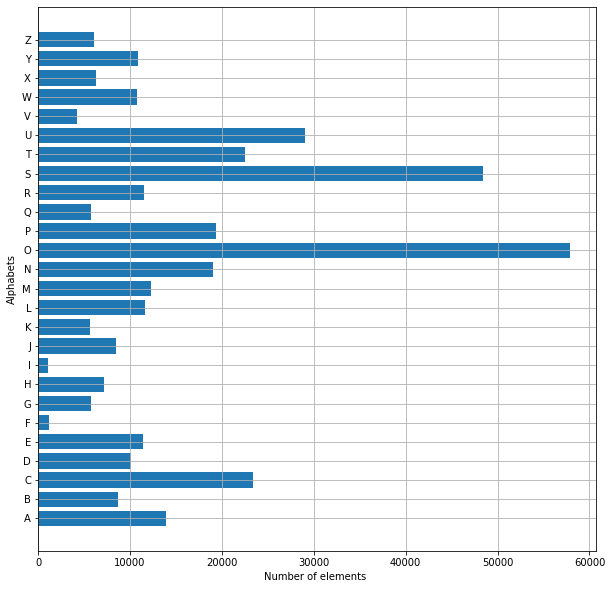

In [17]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1 #y_intの中にある数字の個数ごとにcountに分類する
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10)) #?
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

In [18]:
shuff = shuffle(train_x[:100])
shuff.shape
print(shuff)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


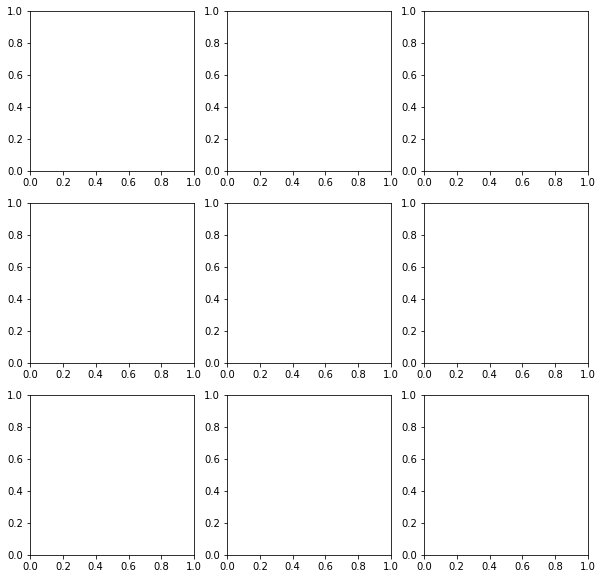

In [19]:
shuff = shuffle(train_x[:100]) #100個のデータをシャッフル
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

In [20]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6db3e19550>,
      dtype=object)

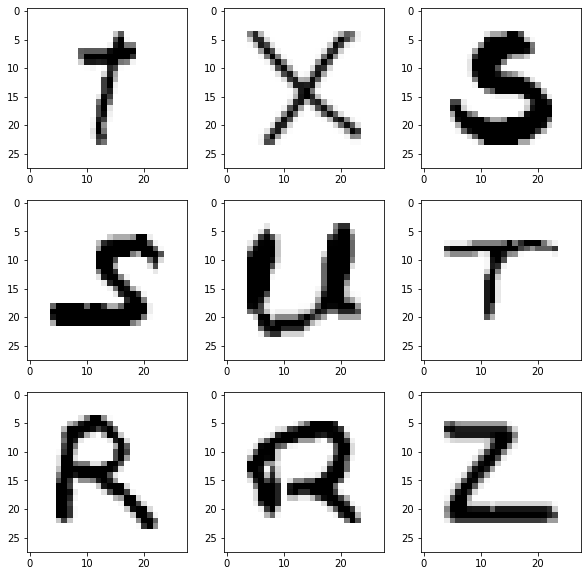

In [21]:
shuff = shuffle(train_x[:100]) #100個のデータをシャッフル
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY) #閾値処理
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys") #shuを疑似的にグレースケール画像として表示してみた感じ？
plt.show()

In [22]:
print(shuff[1].shape)

(28, 28)


In [23]:
print(_)
print(shu)

30.0
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
  200.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
  200. 200. 200.   0.   0.   0.   0.   0.   0.   0.  

In [24]:
train_x.shape[0]

297960

In [25]:
train_x.shape[1]

28

In [26]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1) #モデルに配置できるようにトレーニングとテストのデータセットを再形成
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [27]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int') #単精度浮動小数点値をカテゴリ値（one-hot表現)に変換します。これは、CNNモデルがラベルの入力を受け取り、確率のベクトルとして出力を生成するときに行われます
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int') 
print("New shape of test labels: ", test_yOHE.shape) #train_y, test_yはXの画像と紐づけられている0から26の整数値

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [28]:
print(train_y)
train_y.shape
train_y[297960]

47658      3.0
191690    14.0
3911       0.0
197396    14.0
98088     11.0
          ... 
320028    20.0
6058       0.0
110558    12.0
151191    14.0
123636    13.0
Name: 0, Length: 297960, dtype: float32


19.0

In [29]:
print(train_yOHE)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [31]:
from keras.callbacks import ModelCheckpoint

In [32]:
import os

In [33]:
#checkpoint = ModelCheckpoint(
#                    filepath="/content/drive/MyDrive/卒論/First/model-{epoch:02d}-{val_loss:.2f}.h5",
#                   monitor='val_loss',
#                    verbose=1,
#                    save_best_only=True,
#                    period=1,
#                )

In [34]:
#基本このコードでモデルを保存する（エポックごとのモデルを保存）
checkpoint_path = "/content/drive/MyDrive/卒論/Third/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = ModelCheckpoint(
   checkpoint_path,
   verbose=1,
   save_weights_only=False,
   period=1
)

In [35]:
#modelCheckpoint = ModelCheckpoint(filepath = '/content/drive/MyDrive/卒論/opt30model.h5',
#                                verbose=1,
#                                save_best_only=True,
#                                  save_weights_only=False,
#                                  mode='min',
#                                  period=1)

In [36]:
# TensorFlow経由でデバイス設定の確認が可能です
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16526648452130469457
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16154099712
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13349928780869447021
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

In [37]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=10, batch_size = 512, validation_split=0.2, callbacks=[cp_callback] )

Epoch 1/10
466/466 [==============================] - ETA: 0s - loss: 0.5502 - accuracy: 0.8798
Epoch 00001: saving model to /content/drive/MyDrive/卒論/Third/cp-0001.ckpt
INFO:tensorflow:Assets written to: /content/drive/MyDrive/卒論/Third/cp-0001.ckpt/assets
466/466 [==============================] - 11s 16ms/step - loss: 0.5502 - accuracy: 0.8798 - val_loss: 0.1374 - val_accuracy: 0.9612
Epoch 2/10
462/466 [============================>.] - ETA: 0s - loss: 0.0812 - accuracy: 0.9772
Epoch 00002: saving model to /content/drive/MyDrive/卒論/Third/cp-0002.ckpt
INFO:tensorflow:Assets written to: /content/drive/MyDrive/卒論/Third/cp-0002.ckpt/assets
466/466 [==============================] - 7s 15ms/step - loss: 0.0810 - accuracy: 0.9772 - val_loss: 0.0724 - val_accuracy: 0.9797
Epoch 3/10
463/466 [============================>.] - ETA: 0s - loss: 0.0574 - accuracy: 0.9835
Epoch 00003: saving model to /content/drive/MyDrive/卒論/Third/cp-0003.ckpt
INFO:tensorflow:Assets written to: /content/drive/M

In [39]:
from tensorflow.keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/卒論/Third/cp-0001.ckpt')
saved_model2 = load_model('/content/drive/MyDrive/卒論/Third/cp-0002.ckpt')
saved_model3 = load_model('/content/drive/MyDrive/卒論/Third/cp-0003.ckpt')
saved_model4 = load_model('/content/drive/MyDrive/卒論/Third/cp-0004.ckpt')
saved_model5 = load_model('/content/drive/MyDrive/卒論/Third/cp-0005.ckpt')
saved_model6 = load_model('/content/drive/MyDrive/卒論/Third/cp-0006.ckpt')
saved_model7 = load_model('/content/drive/MyDrive/卒論/Third/cp-0007.ckpt')
saved_model8 = load_model('/content/drive/MyDrive/卒論/Third/cp-0008.ckpt')
saved_model9 = load_model('/content/drive/MyDrive/卒論/Third/cp-0009.ckpt')
saved_model10 = load_model('/content/drive/MyDrive/卒論/Third/cp-0010.ckpt')

In [40]:
result = np.arange(20).reshape(10,2)

In [41]:
result.shape

(10, 2)

In [42]:
result_f32 = result.astype(np.float32)

In [43]:
result_f32.dtype

dtype('float32')

In [44]:
result_f32[0] = saved_model.evaluate(test_X, test_yOHE,verbose=1)
result_f32[1] = saved_model2.evaluate(test_X, test_yOHE,verbose=1)
result_f32[2] = saved_model3.evaluate(test_X, test_yOHE,verbose=1)
result_f32[3] = saved_model4.evaluate(test_X, test_yOHE,verbose=1)
result_f32[4] = saved_model5.evaluate(test_X, test_yOHE,verbose=1)
result_f32[5] = saved_model6.evaluate(test_X, test_yOHE,verbose=1)
result_f32[6] = saved_model7.evaluate(test_X, test_yOHE,verbose=1)
result_f32[7] = saved_model8.evaluate(test_X, test_yOHE,verbose=1)
result_f32[8] = saved_model9.evaluate(test_X, test_yOHE,verbose=1)
result_f32[9] = saved_model10.evaluate(test_X, test_yOHE,verbose=1)

2328/2328 [==============================] - 9s 4ms/step - loss: 0.0559 - accuracy: 0.9875


In [45]:
result_accx = np.arange(10)
result_f32_acc = result_accx.astype(np.float32)
for it in range(10):
  result_f32_acc[it] = result_f32[it][1]

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

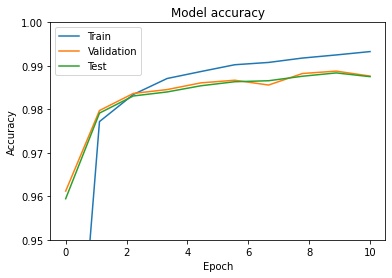

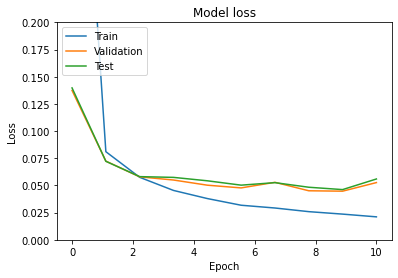

In [47]:
# Plot training & validation accuracy values
xa = np.linspace(0,10,10)
y1a = history.history['accuracy']
y2a = history.history['val_accuracy']
result_accx = np.arange(10)
result_f32_acc = result_accx.astype(np.float32)
for nacc in range(10):
  result_f32_acc[nacc] = result_f32[nacc][1]

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.95,1)

plt.plot(xa, y1a, label='Train')
plt.plot(xa, y2a, label='Validation')
plt.plot(xa, result_f32_acc, label='Test')
plt.legend(loc='upper left')
plt.show()


xs = np.linspace(0,10,10)
y1s = history.history['loss']
y2s = history.history['val_loss']
result_lossx = np.arange(10)
result_f32_loss = result_lossx.astype(np.float32)
for nloss in range(10):
  result_f32_loss[nloss] = result_f32[nloss][0]

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0,0.2)

plt.plot(xs, y1s, label='Train')
plt.plot(xs, y2s, label='Validation')
plt.plot(xs, result_f32_loss, label='Test')
plt.legend(loc='upper left')
plt.show()

In [89]:
import numpy as np
from sklearn.metrics import confusion_matrix

predict_classes = np.argmax(saved_model9.predict(test_X), axis=-1) #model.predictで保存したmodelとテストデータを使って、予測結果のNumpy配列を返す。　その後、np.argmaxで指定された配列の中で最大値となっている要素のうち先頭のインデックスを返す。　つまり機械がそれぞれの画像において一番正解に近いと思っているアルファベットのインデックスを返している
true_classes = test_y #それぞれの画像の正解のインデックスが入っている
print(confusion_matrix(true_classes, predict_classes))#それを混同行列にして表示

[[ 2798     3     0     0     0     0     1     9     0     0     0     1
      2     2     0     0     0     1     0     0     0     0     0     0
      0     0]
 [    2  1746     0     4     1     0     1     0     0     0     0     0
      0     1     1     1     0     0     0     0     0     0     0     0
      0     1]
 [    0     1  4650     0     1     0     1     0     0     1     0     1
      0     0     7     0     1     2     0     2     3     2     0     0
      3     0]
 [    0     6     0  1990     0     0     0     0     0     0     0     0
      0     1    46     2     0     0     0     0     1     0     0     0
      0     0]
 [    0     2    15     0  2299     2     7     0     0     0     0     0
      0     0     0     0     0     0     1     1     0     1     1     0
      0     4]
 [    0     0     0     0     3   222     0     0     0     0     0     0
      0     0     0     0     0     0     0     2     0     0     0     0
      0     1]
 [    0     4     7   

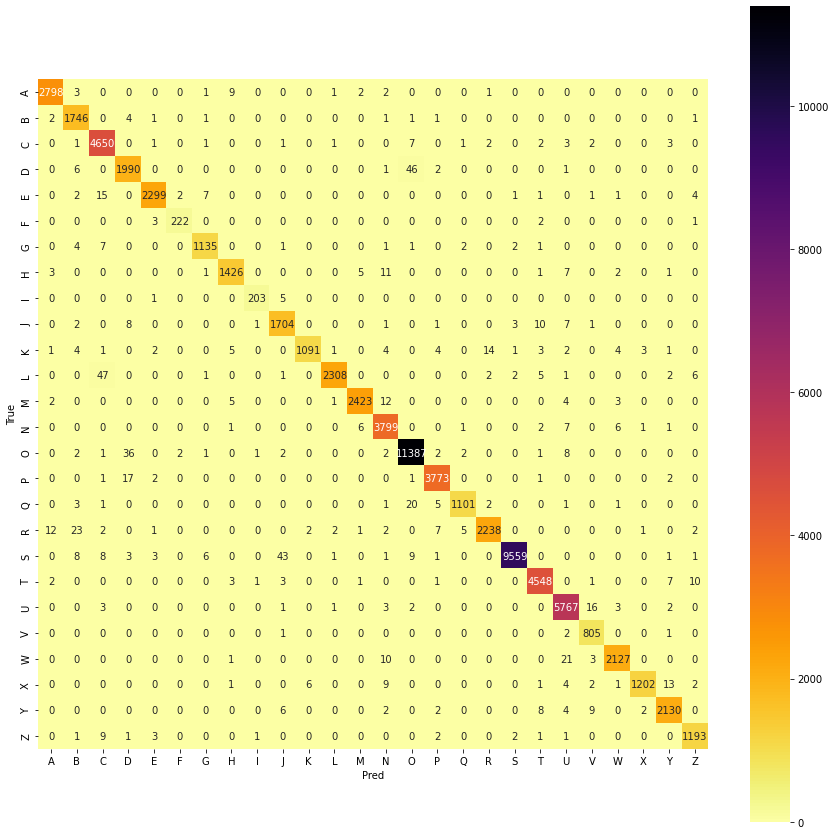

In [90]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
 
def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    columns_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    index_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    df_cmx = pd.DataFrame(cmx_data, index=index_labels, columns=columns_labels)
 
    plt.figure(figsize = (15,15))
    sn.heatmap(df_cmx, annot=True, fmt='g' , square = True, cmap='inferno_r')
    plt.xlabel("Pred")
    plt.ylabel("True")
    plt.show()
 
print_cmx(true_classes, predict_classes)

In [91]:
import numpy as np
from sklearn.metrics import confusion_matrix

predict_classes = np.argmax(saved_model10.predict(test_X), axis=-1) #model.predictで保存したmodelとテストデータを使って、予測結果のNumpy配列を返す。　その後、np.argmaxで指定された配列の中で最大値となっている要素のうち先頭のインデックスを返す。　つまり機械がそれぞれの画像において一番正解に近いと思っているアルファベットのインデックスを返している
true_classes = test_y #それぞれの画像の正解のインデックスが入っている
print(confusion_matrix(true_classes, predict_classes))#それを混同行列にして表示

[[ 2797     0     0     0     0     0     0     8     0     0     0     1
      7     1     0     0     0     2     0     1     0     0     0     0
      0     0]
 [    6  1705     0     8     4     0     4     0     0     0     0     0
      0     1    19     3     0     5     2     0     0     0     0     0
      0     1]
 [    1     0  4623     0     5     0     0     0     0     0     1    25
      0     0     8     0     0     2     0     5     5     0     0     0
      0     0]
 [    0     0     0  1983     0     0     0     0     0     0     0     2
      0     0    60     1     0     0     0     0     0     0     0     0
      0     0]
 [    0     0     6     0  2320     2     0     0     0     0     0     1
      1     0     0     0     0     0     0     1     1     0     0     0
      0     1]
 [    0     0     0     0     1   227     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    1     0    11   

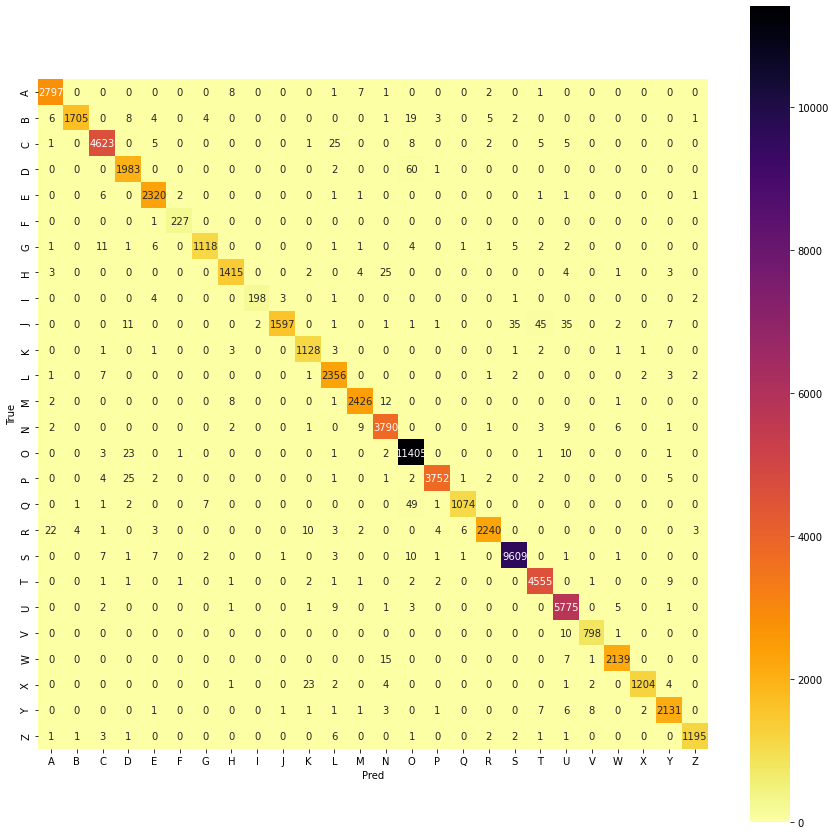

In [92]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
 
def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    columns_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    index_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    df_cmx = pd.DataFrame(cmx_data, index=index_labels, columns=columns_labels)
 
    plt.figure(figsize = (15,15))
    sn.heatmap(df_cmx, annot=True, fmt='g' ,square = True ,cmap='inferno_r')
    plt.xlabel("Pred")
    plt.ylabel("True")
    plt.show()
 
print_cmx(true_classes, predict_classes)